Theorem 4.1

Yan-Ran Li， Raymond H. Chan， Lixin Shen,Yung-Chin Hsu and Wen-Yih Isaac Tseng, An Adaptive Directional Haar Framelet-Based Reconstruction Algorithm for Parallel Magnetic Resonance Imaging, SIAM J. IMAGING SCIENCES, Vol. 9, No. 2, pp. 794–821


Li Q, Zhang N. Fast proximity-gradient algorithms for structured convex optimization
problems[J]. Applied and Computational Harmonic Analysis, 2016, 41(2): 491–517. Equation (53)

(512, 512)
lambda 0.05 alpha 0.2 beta 1
original image minus noisy image 36.10398463531314


C:\Users\LRR\AppData\Local\Temp\ipykernel_11828\3383283182.py:87: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131), plt.imshow(image_original,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off')
C:\Users\LRR\AppData\Local\Temp\ipykernel_11828\3383283182.py:94: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2400x2400 with 0 Axes>

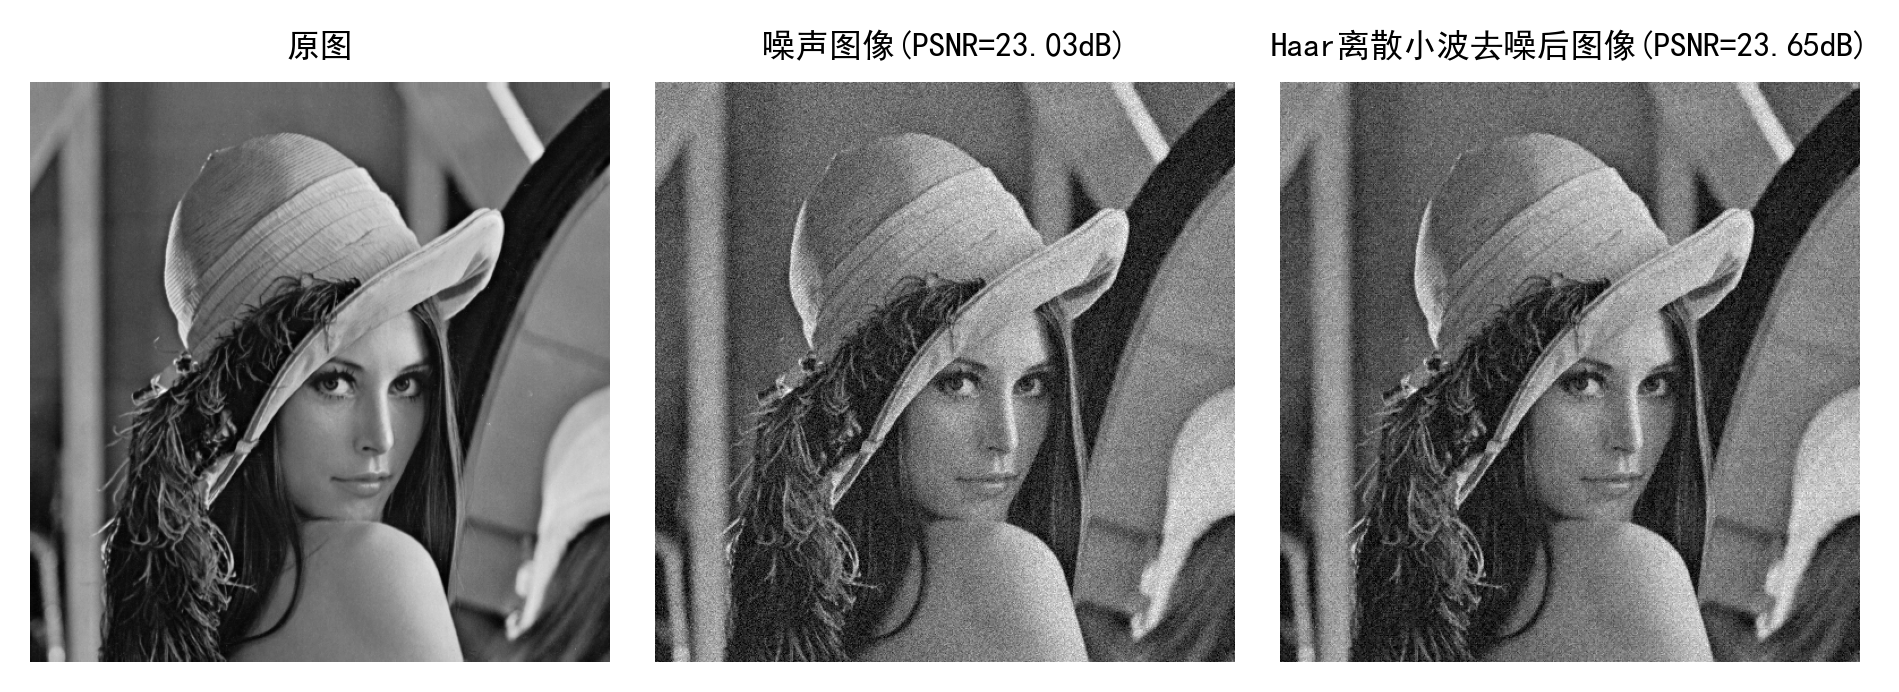

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import daub
import pywt 
from skimage import io
from skimage import util
import cv2  

# 定义计算 PSNR 函数
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2) # 计算均方误差
    if mse == 0: # 如果两幅图像完全相同，返回无穷大
        return np.inf
    else: # 否则，根据公式计算 PSNR
        return 20 * np.log10(1/ np.sqrt(mse))

image = io.imread("lena.png")
image_original=np.array(image/ 255, dtype=float)
#image_original=np.array(cv2.pyrDown(cv2.pyrDown(image))/ 255, dtype=float)
#print('original image',image_original[0,0:10])
print(image_original.shape)
img = util.random_noise(image_original, mode='gaussian', mean=0, var=0.005)
#print('noisy image',img[0,0:10])
v=np.random.normal(0,0.2,img.shape)
#v=np.zeros_like(img) 
vtidle=np.random.normal(0,0.2,img.shape)
w=np.copy(img)
wtidle=np.copy(img)
#v=np.copy(img.reshape(-1, 1))
lamb=0.05
alpha=0.2
beta=1
t=1

rows, cols = img.shape
half_rows = rows // 2  
half_cols = cols // 2

#print('w',w[0:5,0:5])

def matrix2fourblock(A):
    block=A[:half_rows, :half_cols],(A[:half_rows, half_cols:],A[half_rows:, :half_cols],A[half_rows:, half_cols:])
    return block

for l in range(100):
    coeffs = pywt.dwt2(w,'db1','per')  #Fw, DWT for image w
    cA, (cH,cV,cD) = coeffs   #LL, (HL, LH, HH) 
    
    #print('cA=\n',cA[1:5,1:5])
    #print('cV=\n',cV[1:5,1:5])
    #print('v',v[1:5,1:5])
    vtidleA=np.clip(v[:half_rows, :half_cols]+beta*cA,0,lamb)
    vtidleH=np.clip(v[:half_rows, half_cols:]+beta*cH,0,lamb)
    vtidleV=np.clip(v[half_rows:, :half_cols]+beta*cV,0,lamb)
    vtidleD=np.clip(v[half_rows:, half_cols:]+beta*cD,0,lamb)
    #print('vtidleA',vtidleA[1:5,1:5])
        
    vtidle[:half_rows, :half_cols]=vtidleA
    vtidle[:half_rows, half_cols:]=vtidleH
    vtidle[half_rows:, :half_cols]=vtidleV
    vtidle[half_rows:, half_cols:]=vtidleD
 
    
    tem=2*vtidleA-v[:half_rows, :half_cols],(2*vtidleH-v[:half_rows, half_cols:],2*vtidleV-v[half_rows:, :half_cols],2*vtidleD-v[half_rows:, half_cols:])

    tem_idwt= pywt.idwt2(tem, 'db1','per')
    
    wtidle=np.clip(w-alpha*tem_idwt-alpha*(w-img),0,1)  #matrix
    
    t=(1+ np.sqrt(1+4*(t**2)) )/2
    #print('t',t)
       
    v=v+ ((t-1)/t+1)*(vtidle-v)
    w=w+ ((t-1)/t+1)*(wtidle-w)
       
    #print('recovered error', np.linalg.norm(w-img, 'fro'))

#print('w_rec',w[0:5,0:5])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
print('lambda',lamb,'alpha',alpha,'beta', beta)
print('original image minus noisy image', np.linalg.norm(img-image_original, 'fro'))
plt.subplot(131), plt.imshow(image_original,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off')
psnr_noise=psnr(image_original,img)
plt.subplot(132), plt.imshow(img,'gray'), plt.title(f'噪声图像(PSNR={psnr_noise:.2f}dB)',fontsize=8), plt.axis('off') 
psnr_recovered = psnr(image_original,w)
plt.subplot(133), plt.imshow(w,'gray'), plt.title(f'Haar离散小波去噪后图像(PSNR={psnr_recovered:.2f}dB)',fontsize=8),  plt.axis('off')

# 显示所有图像  
plt.tight_layout()  
plt.savefig('Lena_DWT.png')
plt.show()

In [24]:
import pywt
import numpy as np
coeffs = pywt.dwt2(np.ones((4,4)),'db1','per')  
#print pywt.MODES.modes [’zpd’, ’cpd’, ’sym’, ’ppd’, ’sp1’, ’per’]
cA, (cH,cV,cD) = coeffs
print(coeffs)
print('cA',cA)
print('cH',cH)
cA=np.array([[10., 10.],[10., 10.]])
coeffs1=[cA, (cH,cV,cD)]
print('coeffs_new',coeffs1)

(array([[2., 2.],
       [2., 2.]]), (array([[0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.]])))
cA [[2. 2.]
 [2. 2.]]
cH [[0. 0.]
 [0. 0.]]
coeffs_new [array([[10., 10.],
       [10., 10.]]), (array([[0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.]]))]


函数式：skimage.util.random_noise(image, mode=‘gaussian’, seed=None, clip=True, **kwargs)

参数介绍：
image：输入图像，类型为ndarray；
mode：噪声类别，有以下几种：
    'gaussian'：高斯噪声；
    'localvar'：高斯分布的加性噪声，在图像每个点都有特点的局部方差；
    'poisson'：泊松噪声；
    'salt'：盐噪声，随机将图像像素值变为1；
    'pepper'：椒噪声，随机将图像像素值变为0或-1；
    's&p'：椒盐噪声；
    'speckle'：均匀噪声，（均值mean方差variance），out=image+n*image，n是具有指定均值和方差的均匀噪声；
seed：可选，int型，如果选择的话，则会在生成噪声前设置随机种子；
clip：可选，bool型，若为True(default)则在加入‘speckle’,‘poisson’,或 ‘gaussian’这三种噪声后，
      进行剪切以保证图像数据点都在[0,1]或[-1.1]之间。若为False，则数据可能超出这个范围；
mean：可选，float型，用于’gaussian’和‘speckle’的均值设置，默认为0；
var：可选，float型，用于’gaussian’和‘speckle’的方差设置，默认为0.01；
local_vars：可选，ndarray型，用于‘localvar’的图像每个像素点处的局部方差设置；
amount：可选，float型，用于‘salt’,‘pepper’和‘s&p’的噪声比例，默认为0.05；
salt_vs_pepper：可选，float型，用于's&p'中盐噪声与椒噪声的比例，范围为[0, 1]，默认为0.5；

Haar Discrete Wavelet Transform (内置函数)

(256, 256)
(128, 128)
error 8.929781697958497e-12


C:\Users\LRR\AppData\Local\Temp\ipykernel_11828\1079233834.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141), plt.imshow(cA,'gray'), plt.title(f'近似系数',fontsize=8), plt.axis('off')


<Figure size 2400x2400 with 0 Axes>

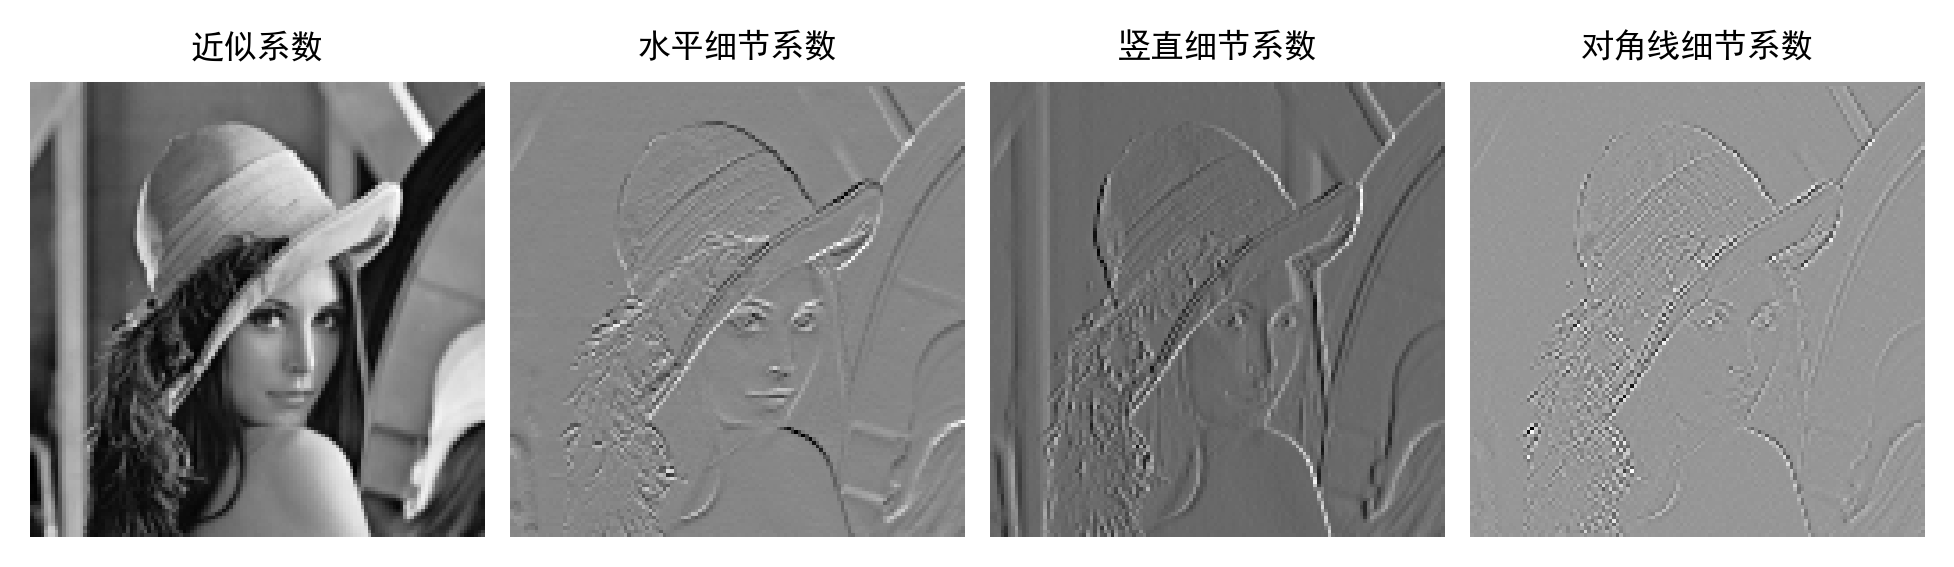

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import daub
import pywt
from skimage import io
import cv2 

image = io.imread("lena.png")
img=cv2.pyrDown(image)
print(img.shape)
# plt.title('lena')
# plt.imshow(img, cmap="gray")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  

coeffs = pywt.dwt2(img,'db1','per')
cA, (cH,cV,cD) = coeffs
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
plt.subplot(141), plt.imshow(cA,'gray'), plt.title(f'近似系数',fontsize=8), plt.axis('off') 
plt.subplot(142), plt.imshow(cH,'gray'), plt.title(f'水平细节系数',fontsize=8),  plt.axis('off') 
plt.subplot(143), plt.imshow(cV,'gray'), plt.title(f'竖直细节系数',fontsize=8),  plt.axis('off') 
plt.subplot(144), plt.imshow(cD,'gray'), plt.title(f'对角线细节系数',fontsize=8),  plt.axis('off') 
# plt.savefig('Lena_DWT.png')
print(cA.shape)

Recovered=pywt.idwt2(coeffs, 'db1','per')
print('error', np.linalg.norm(img-Recovered, 'fro'))
#plt.imshow(Recovered-image,'gray')


Comparison

In [26]:
import cv2  
import numpy as np  
  
# 创建一个矩阵  
image = np.array([[1, 2, 3, 4],  
                   [5, 6, 7, 8],  
                   [9, 10, 11, 12],  
                   [13, 14, 15, 16]], dtype=np.float32) 
coeffs=pywt.dwt2(image,'db1','per')
cA, (cH,cV,cD) = coeffs
print('cA=\n',cA)

h0 = np.array([[1.0,1.0],[1.0,1.0]])/2
c0 =cv2.filter2D(image, -1, h0) 
print('c0=\n',c0)
print(c0[1::2,1::2])

h1 = np.array([[1.0,1.0],[-1.0,-1.0]])/2
c1 =cv2.filter2D(image, -1, h1) 
print('c1=\n',c1)
print('cH',cH)
print(c1[1::2,1::2])

cA=
 [[ 6.9999995 11.       ]
 [23.        27.       ]]
c0=
 [[ 7.  7.  9. 11.]
 [ 7.  7.  9. 11.]
 [15. 15. 17. 19.]
 [23. 23. 25. 27.]]
[[ 7. 11.]
 [23. 27.]]
c1=
 [[ 4.  4.  4.  4.]
 [-4. -4. -4. -4.]
 [-4. -4. -4. -4.]
 [-4. -4. -4. -4.]]
cH [[-3.9999995 -4.       ]
 [-3.9999998 -4.       ]]
[[-4. -4.]
 [-4. -4.]]


In [27]:
def format_array(arr):
    return "[%s]" % ", ".join(["%.14f" % x for x in arr])

import pywt
wavelet = pywt.Wavelet('db1')
print(wavelet)
print(format_array(wavelet.dec_lo), format_array(wavelet.dec_hi))
print(format_array(wavelet.rec_lo), format_array(wavelet.rec_hi))

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
[0.70710678118655, 0.70710678118655] [-0.70710678118655, 0.70710678118655]
[0.70710678118655, 0.70710678118655] [0.70710678118655, -0.70710678118655]


Using custom wavelet自定义滤波器：https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html#wavelet-object

In [ ]:
import pywt, math
c = math.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
#print(filter_bank)
myWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)
#inverse_filter_bank
#[rec_lo[::-1], rec_hi[::-1], dec_lo[::-1], dec_hi[::-1]]


In [ ]:
#The following example illustrates the way of creating custom Wavelet objects from plain Python lists of filter coefficients 
#and a filter bank-like object.
import pywt, math
class HaarFilterBank(object):
      #@property
    def filter_bank(self):
            c = math.sqrt(2)/2
            dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
            return [dec_lo, dec_hi, rec_lo, rec_hi]
filter_bank = HaarFilterBank()
myOtherWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5, 6], 'myOtherWavelet')

Haar Discrete Wavelet Transform (卷积计算)

Shen, An Adaptive Directional Haar Framelet-Based Reconstruction Algorithm for Parallel Magnetic Resonance Imaging2016

In [ ]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
# 读取图像  
image = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)   
# 定义四个卷积核reconstruction  
h0 = np.array([[1.0,1.0],[1.0,1.0]])/2  
h1 = np.array([[1.0,1.0],[-1.0,-1.0]])/2
h2 = np.array([[1.0,-1.0],[1.0,-1.0]])/2
h3 = np.array([[1.0,-1.0],[-1.0,1.0]])/2
# 定义四个卷积核decomposition inverse_filter_bank
h0_dec=np.flip(np.flip(h0,axis=0), axis=1)
h1_dec=np.flip(np.flip(h1,axis=0), axis=1)
h2_dec=np.flip(np.flip(h2,axis=0), axis=1)
h3_dec=np.flip(np.flip(h3,axis=0), axis=1)
# 对图像进行卷积   #cv2.pyrDown; cv2.pyrUp
c0 = cv2.filter2D(image, -1, h0_dec) 
c1 = cv2.filter2D(image, -1, h1_dec)
c2 = cv2.filter2D(image, -1, h2_dec)
c3 = cv2.filter2D(image, -1, h3_dec)


# 显示原图像和卷积后的图像 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(4, 4))
# plt.subplot(221), plt.imshow(c0,'gray'), plt.title(f'低频系数',fontsize=8), plt.axis('off') 
# plt.subplot(222), plt.imshow(c1,'gray',alpha=0.5), plt.title(f'水平高频系数',fontsize=8),  plt.axis('off') 
# plt.subplot(223), plt.imshow(c2,'gray',alpha=0.5), plt.title(f'竖直高频系数',fontsize=8),  plt.axis('off') 
# plt.subplot(224), plt.imshow(c3,'gray',alpha=0.5), plt.title(f'对角线高频系数',fontsize=8),  plt.axis('off') 


# Recovered=cv2.filter2D(c0,-1, h0)+cv2.filter2D(c1, -1, h1)+cv2.filter2D(c2,-1,h2)+cv2.filter2D(c3,-1,h3)
# print('error', np.linalg.norm(image-Recovered, 'fro'))
# plt.imshow(Recovered-image,'gray')
# plt.axis('off')
# print('image Shape',image.shape)
# print('Recovered Shape',Recovered.shape) 

 Directional Haar Framelet (DHF) System

Shen, An Adaptive Directional Haar Framelet-Based Reconstruction Algorithm for Parallel Magnetic Resonance Imaging2016, (3.5)

In [ ]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
# 读取图像  
image = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)   
# 定义四个卷积核  
h0 = np.array([[1.0,1.0],[1.0,1.0]])/4  
h1 = np.array([[1.0,0.0],[0.0,-1.0]])/4 
h2 = np.array([[0.0,-1.0],[1.0,0.0]])/4 
h3 = np.array([[1.0,-1.0],[0.0,0.0]])/4
h4 = np.array([[1.0,0.0],[-1.0,0.0]])/4 
h5 = np.array([[0.0,0.0],[1.0,-1.0]])/4
h6 = np.array([[0.0,1.0],[0.0,-1.0]])/4 
# 对图像进行卷积  
c0 = cv2.filter2D(image, -1, h0)  
c1 = cv2.filter2D(image, -1, h1)
c2 = cv2.filter2D(image, -1, h2)
c3 = cv2.filter2D(image, -1, h3)
c4 = cv2.filter2D(image, -1, h4)
c5 = cv2.filter2D(image, -1, h5)
c6 = cv2.filter2D(image, -1, h6)
# 显示原图像和卷积后的图像 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
plt.subplot(241), plt.imshow(image,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off') 
plt.subplot(242), plt.imshow(c0,'gray'), plt.title(f'低频系数',fontsize=8), plt.axis('off') 
plt.subplot(243), plt.imshow(c1,'gray',alpha=0.5), plt.title(f'高频系数1',fontsize=8),  plt.axis('off') 
plt.subplot(244), plt.imshow(c2,'gray',alpha=0.5), plt.title(f'高频系数2',fontsize=8),  plt.axis('off') 
plt.subplot(245), plt.imshow(c3,'gray',alpha=0.5), plt.title(f'高频系数3',fontsize=8),  plt.axis('off') 
plt.subplot(246), plt.imshow(c4,'gray',alpha=0.5), plt.title(f'高频系数4',fontsize=8),  plt.axis('off') 
plt.subplot(247), plt.imshow(c5,'gray',alpha=0.5), plt.title(f'高频系数5',fontsize=8),  plt.axis('off') 
plt.subplot(248), plt.imshow(c6,'gray',alpha=0.5), plt.title(f'高频系数6',fontsize=8),  plt.axis('off') 

DCT-based Tight Framelet System

Yan-Ran Li, Lixin Shen, Bruce W. Suter, Adaptive Inpainting Algorithm Based on DCT Induced Wavelet Regularization,IEEE TRANSACTIONS ON IMAGE PROCESSING, VOL. 22, NO. 2, FEBRUARY 2013

C:\Users\LRR\AppData\Local\Temp\ipykernel_11828\447447859.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(251), plt.imshow(image,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off')


(<Axes: title={'center': '高频系数6'}>,
 Text(0.5, 1.0, '高频系数6'),
 (-0.5, 511.5, 511.5, -0.5))

<Figure size 2400x2400 with 0 Axes>

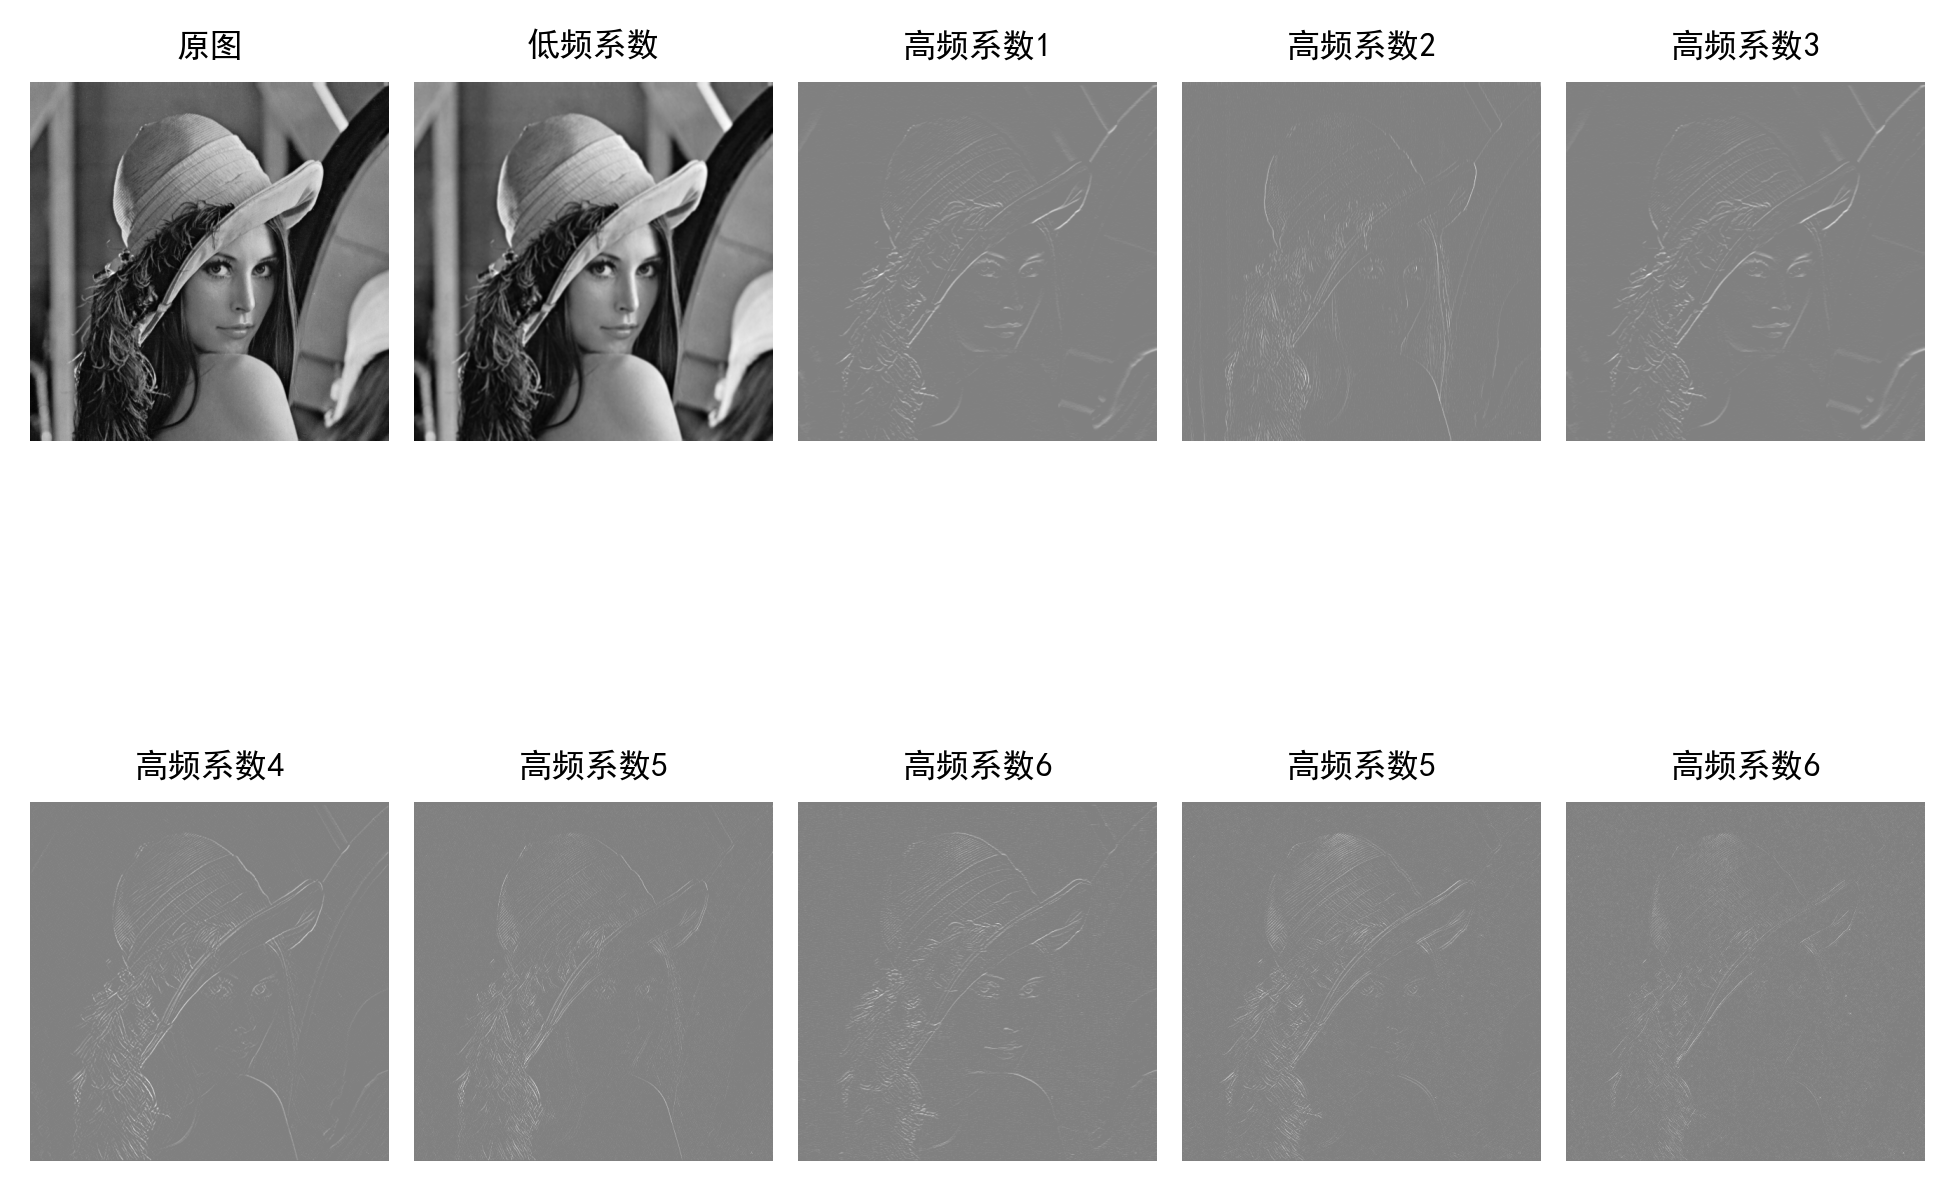

In [66]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
# 读取图像  
image = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)   
# 定义四个卷积核  
h0 = np.array([[1.0,1.0,1.0],[1.0,1.0,1.0],[1.0,1.0,1.0]])/9  
h1 = np.array([[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]])*(np.sqrt(6)/18) 
h2 = np.array([[1.0,-2.0,1.0],[1.0,-2.0,1.0],[1.0,-2.0,1.0]])*(np.sqrt(2)/18)
h3 = np.array([[1.0,1.0,1.0],[0.0,0.0,0.0],[-1.0,-1.0,-1.0]])*(np.sqrt(6)/18)
h4 = np.array([[1.0,0.0,-1.0],[0.0,0.0,0.0],[-1.0,0.0,1.0]])*(1/6)
h5 = np.array([[1.0,-2.0,1.0],[0.0,0.0,0.0],[-1.0,2.0,-1.0]])*(np.sqrt(3)/18)
h6 = np.array([[1.0,1.0,1.0],[-2.0,-2.0,-2.0],[1.0,1.0,1.0]])*(np.sqrt(2)/18)
h7 = np.array([[1.0,0.0,-1.0],[-2.0,0.0,2.0],[1.0,0.0,-1.0]])*(np.sqrt(3)/18)
h8 = np.array([[1.0,-2.0,1.0],[-2.0,4.0,-2.0],[1.0,-2.0,1.0]])*(1/18)
# 对图像进行卷积  
c0 = cv2.filter2D(image, -1, h0)  
c1 = cv2.filter2D(image, -1, h1)
c2 = cv2.filter2D(image, -1, h2)
c3 = cv2.filter2D(image, -1, h3)
c4 = cv2.filter2D(image, -1, h4)
c5 = cv2.filter2D(image, -1, h5)
c6 = cv2.filter2D(image, -1, h6)
c7 = cv2.filter2D(image, -1, h7)
c8 = cv2.filter2D(image, -1, h8)
# 显示原图像和卷积后的图像 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
fig = plt.figure(figsize=(8, 8))
plt.subplots(constrained_layout=True)
plt.subplot(251), plt.imshow(image,'gray'), plt.title(f'原图',fontsize=8), plt.axis('off') 
plt.subplot(252), plt.imshow(c0,'gray'), plt.title(f'低频系数',fontsize=8), plt.axis('off') 
plt.subplot(253), plt.imshow(c1,'gray',alpha=0.5), plt.title(f'高频系数1',fontsize=8),  plt.axis('off') 
plt.subplot(254), plt.imshow(c2,'gray',alpha=0.5), plt.title(f'高频系数2',fontsize=8),  plt.axis('off') 
plt.subplot(255), plt.imshow(c3,'gray',alpha=0.5), plt.title(f'高频系数3',fontsize=8),  plt.axis('off') 
plt.subplot(256), plt.imshow(c4,'gray',alpha=0.5), plt.title(f'高频系数4',fontsize=8),  plt.axis('off') 
plt.subplot(257), plt.imshow(c5,'gray',alpha=0.5), plt.title(f'高频系数5',fontsize=8),  plt.axis('off') 
plt.subplot(258), plt.imshow(c6,'gray',alpha=0.5), plt.title(f'高频系数6',fontsize=8),  plt.axis('off') 
plt.subplot(259), plt.imshow(c7,'gray',alpha=0.5), plt.title(f'高频系数5',fontsize=8),  plt.axis('off') 
plt.subplot(2,5,10), plt.imshow(c8,'gray',alpha=0.5), plt.title(f'高频系数6',fontsize=8),  plt.axis('off') 

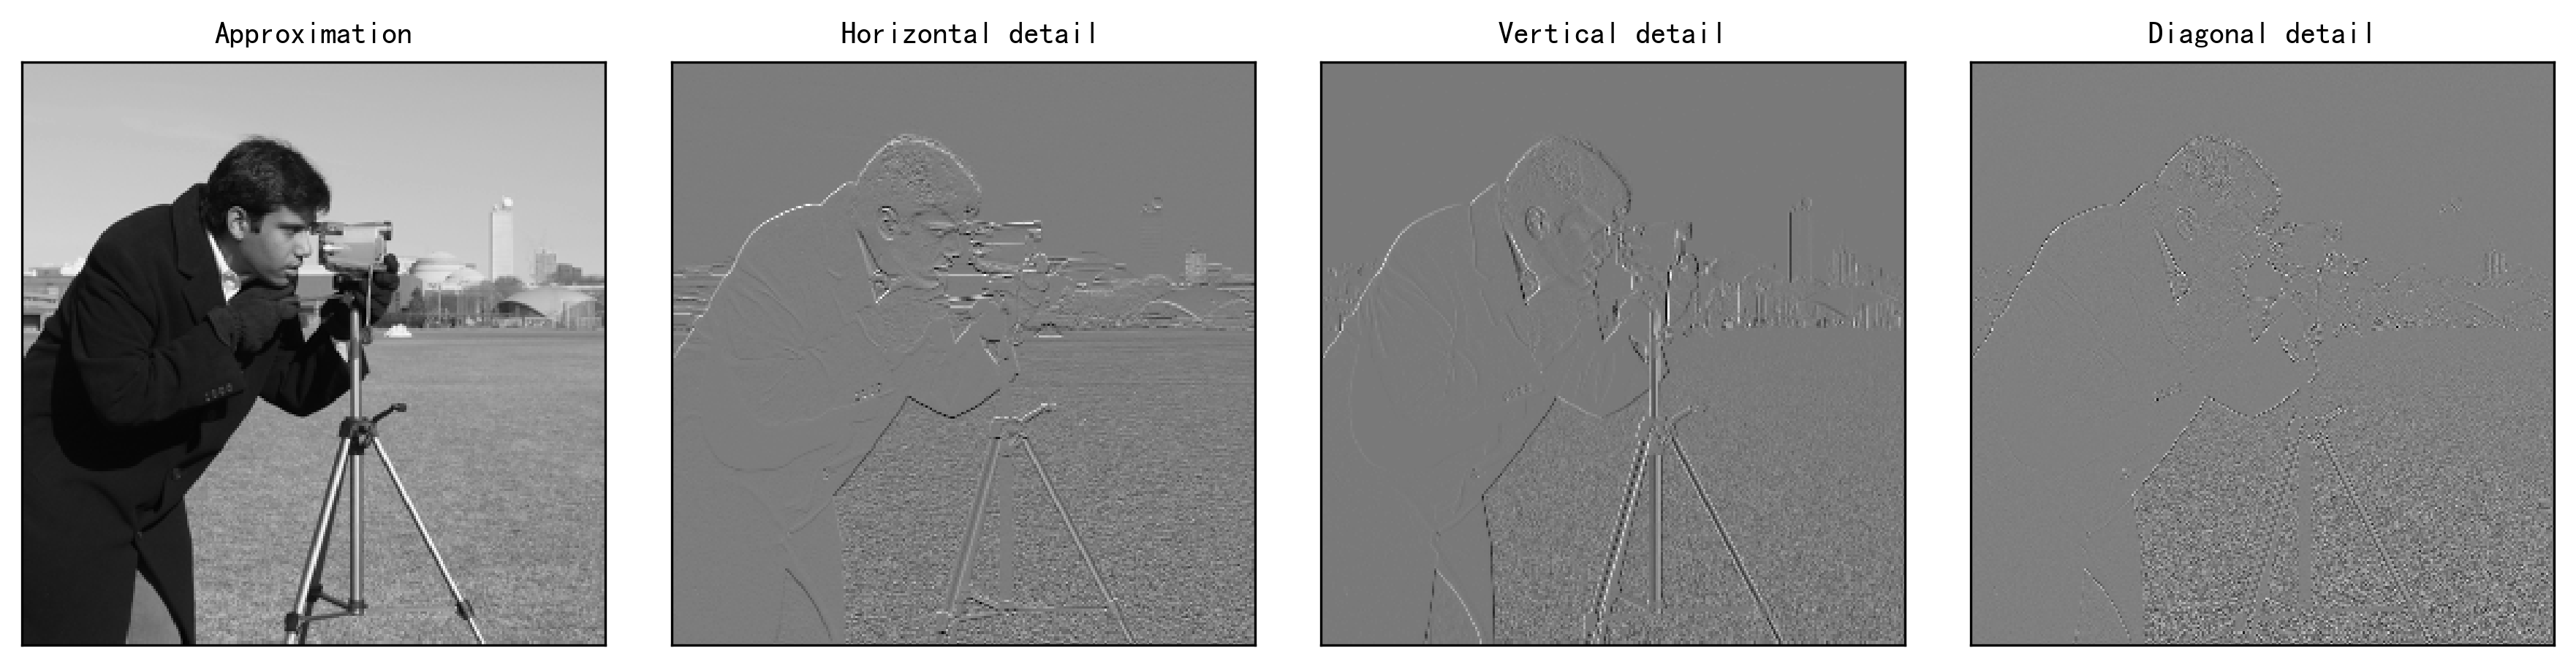

In [65]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
#x = numpy.array([[1, 2, 3, 4, 5, 6, 7, 8]] * 8, 'd')
#https://pywavelets.readthedocs.io/en/latest/regression/dwt-idwt.html
